# Data Timeline Bar Plots

Trying to visualize the timeline of the data being used in the model. Two versions were created to also visualize the reporting frequency or the reporting level of the data as well.

#### load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
import matplotlib.patches as mpatches
# makes the figures higher quality.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# load custom style
import matplotlib.style as style
plt.style.use("markerr.mplstyle")

#### Create data to visualize.

In [2]:
df = pd.DataFrame({
    'data_level':['Zip Code','Zip Code',
                    'Zip Code','Zip Code',
                    'State','State',
                    'Local Government','Local Government',
                  'State','State',
                  'Zip Code', 'Zip Code'
                   ],
    'data_num':[0,0,
                1,1,
                2,2,
                3,3,
                4,4,
                5,5,
               ],
    'date':[datetime.datetime(2014,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,6,1),
            datetime.datetime(2012,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2011,1,1),datetime.datetime(2021,7,1),
            datetime.datetime(2011,1,1),datetime.datetime(2019,1,1),

           ],
    'frequency':['monthly','monthly',
                 'daily','daily',
                 'monthly','monthly',
                 'monthly','monthly',
                 'quarterly','quarterly',
                 'yearly','yearly'],

                 
    'data_name':['Zillow Rent Index','Zillow Rent Index',
                 'Business Permits','Business Permits',
                 'Natural Gas Production','Natural Gas Production',
                 'City Tax Collection','City Tax Collection',
                 'Texas State Polling','Texas State Polling',
                 'American Community Survey', 'American Community Survey'
       ]
})

In [3]:
# check that the df looks like it should
df

,data_level,data_num,date,frequency,data_name
0,Zip Code,0,2014-01-01,monthly,Zillow Rent Index
1,Zip Code,0,2021-07-01,monthly,Zillow Rent Index
2,Zip Code,1,2012-01-01,daily,Business Permits
3,Zip Code,1,2021-07-01,daily,Business Permits
4,State,2,2012-01-01,monthly,Natural Gas Production
5,State,2,2021-06-01,monthly,Natural Gas Production
6,Local Government,3,2012-01-01,monthly,City Tax Collection
7,Local Government,3,2021-07-01,monthly,City Tax Collection
8,State,4,2011-01-01,quarterly,Texas State Polling
9,State,4,2021-07-01,quarterly,Texas State Polling


In [4]:
viz_df = df.copy()
df_temp = pd.DataFrame()
# adding another row for each 30 days between the start and stop date for our data.
# looping through each data_name and adding the points between the start and end dates.
for data_name in viz_df.data_name.unique():
    data_name_df = viz_df[viz_df['data_name']==data_name]
    data_name_df = data_name_df.reset_index(drop=True)
    # saving the values for each column for later.
    data_level = data_name_df.loc[0,'data_level']
    data_num = data_name_df.loc[0,'data_num']
    frequency = data_name_df.loc[0,'frequency']
    #creating list of new dates between existing dates
    sdate = data_name_df.loc[0,'date']
    edate = data_name_df.loc[1,'date']
    date_delta = 30
    date = [sdate+timedelta(days=x) for x in range((edate-sdate).days)]
    # defining how many rows will be added
    num_new_rows = len(date)
    # adding new row.
    new_row = {'date':date,
               'data_num':[data_num]*num_new_rows,
               'data_name':[data_name]*num_new_rows,
               'frequency':[frequency]*num_new_rows,
               'data_level':[data_level]*num_new_rows,               
           }
    df_new_row = pd.DataFrame(new_row)
    df_temp = df_temp.append(df_new_row, ignore_index = True)
viz_df = viz_df.append(df_temp, ignore_index = True)

It is the same as the above but now many more data points to make the bar apprea solid between start and stop dot.

In [5]:
viz_df

,data_level,data_num,date,frequency,data_name
0,Zip Code,0,2014-01-01,monthly,Zillow Rent Index
1,Zip Code,0,2021-07-01,monthly,Zillow Rent Index
2,Zip Code,1,2012-01-01,daily,Business Permits
3,Zip Code,1,2021-07-01,daily,Business Permits
4,State,2,2012-01-01,monthly,Natural Gas Production
...,...,...,...,...,...
19878,Zip Code,5,2018-12-27,yearly,American Community Survey
19879,Zip Code,5,2018-12-28,yearly,American Community Survey
19880,Zip Code,5,2018-12-29,yearly,American Community Survey
19881,Zip Code,5,2018-12-30,yearly,American Community Survey


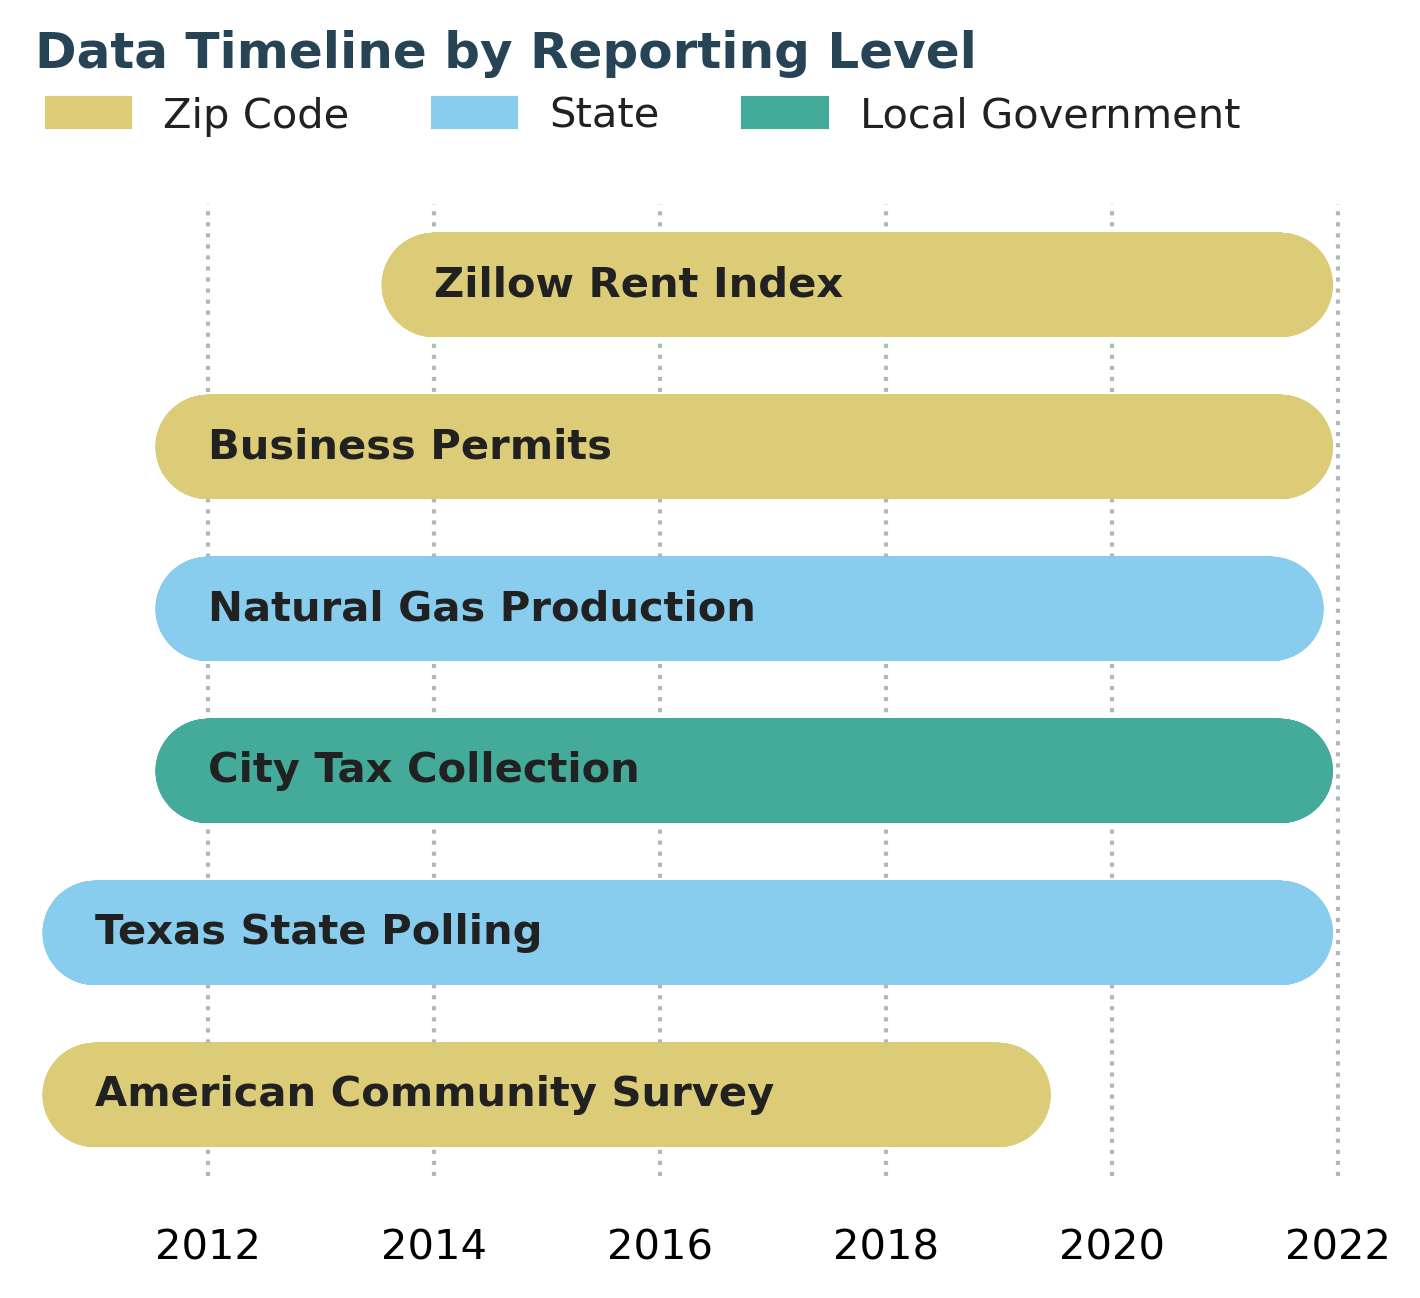

In [6]:
# make color palette
colors = ['#ddcc77','#88ccee','#44aa99']
# create figure
fig, ax= plt.subplots(figsize=(5,4))
g=sns.stripplot(hue="data_level",y='data_num', x="date",
              data=viz_df,orient="h", 
              jitter=False, s=25, linewidth=0,ax=ax,
              palette=colors
               )
# put in text annotation in each bar.
for row in range(0,len(df),2):
    plt.text(x = df.loc[row,'date'], 
             y = df.loc[row,'data_num'], 
             s = df.loc[row,'data_name'],
            verticalalignment='center',
            fontweight='bold',
            color = '#212121')
    
# create legend
acutal_patch = mpatches.Patch(color=colors[0], 
                           label='Zip Code')
lasso_patch = mpatches.Patch(color=colors[1], 
                           label='State')
rf_patch = mpatches.Patch(color=colors[2], 
                           label='Local Government')
plt.legend(handles=[acutal_patch,lasso_patch,rf_patch],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1.09),frameon=False,ncol=3,
                title = '')
    
# axis labels and titles
g.set(xlabel='', ylabel='',title='Data Timeline by Reporting Level\n\n')
# remove y ticks
g.set_yticklabels([])

plt.show()

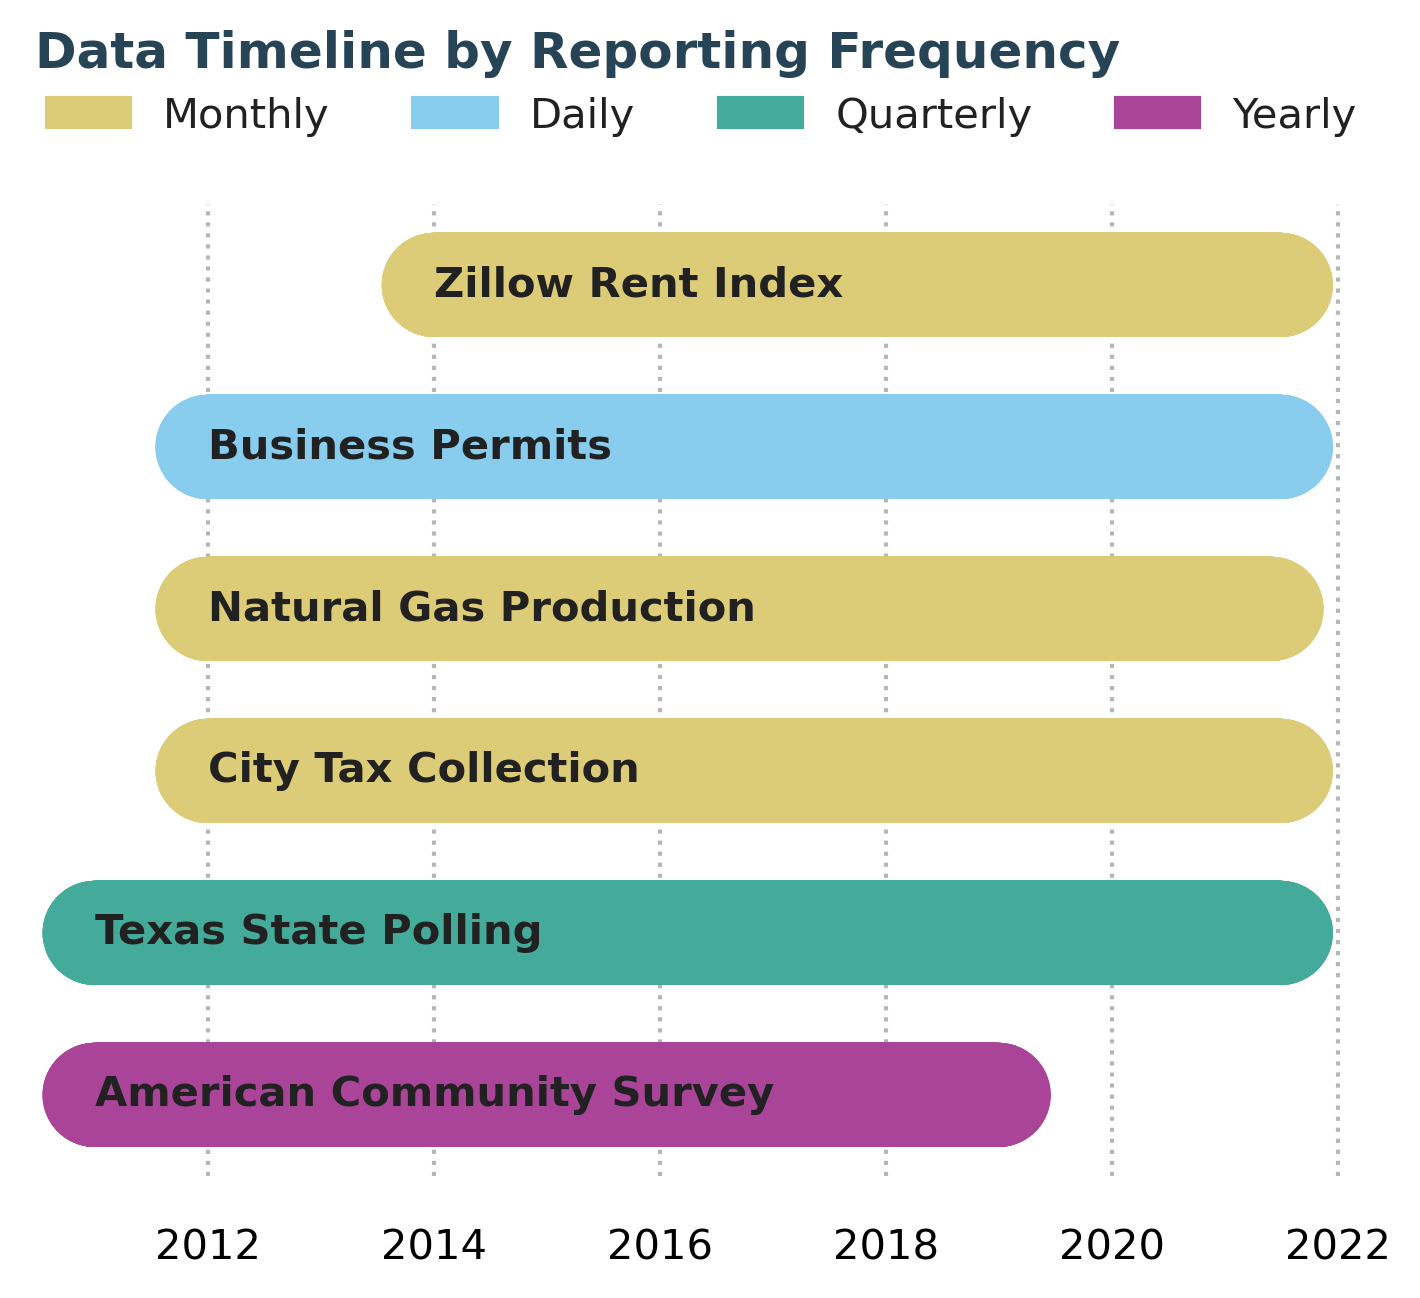

In [7]:
# make color palette
colors = ['#ddcc77','#88ccee','#44aa99','#aa4499']
# Create figure
fig, ax= plt.subplots(figsize=(5,4))
g = sns.stripplot(
    hue="frequency",y='data_num', x="date",
    data=viz_df,orient="h", 
    jitter=False, s=25, linewidth=0,ax=ax,
    palette=colors
)
# put in text annotation in each bar.
for row in range(0,len(df),2):
    plt.text(
        x = df.loc[row,'date'], 
        y = df.loc[row,'data_num'], 
        s = df.loc[row,'data_name'],
        verticalalignment='center',
        fontweight='bold',
        color = '#212121'
    )
# create legend patches
Monthly = mpatches.Patch(color=colors[0], 
                           label='Monthly')
Daily = mpatches.Patch(color=colors[1], 
                           label='Daily')
Quarterly = mpatches.Patch(color=colors[2], 
                           label='Quarterly')
Yearly = mpatches.Patch(color=colors[3], 
                           label='Yearly')
plt.legend(
    handles=[Monthly,Daily,Quarterly,Yearly],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1.09),frameon=False,ncol=4,
                title = '')
# axis labels and titles
g.set(xlabel='', ylabel='',title='Data Timeline by Reporting Frequency\n\n')
# remove y ticks
g.set_yticklabels([])

plt.show()